In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

# Load the Data

In [3]:
file_name = 'train set.csv'
train = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [4]:
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [5]:
file_name = 'test set.csv'
test = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [6]:
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


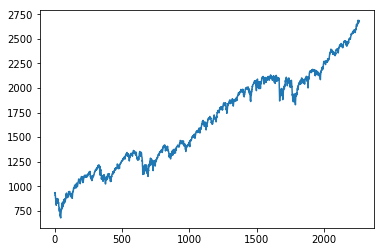

In [7]:
close_price = train['Close Price']
close_price.plot()

# Prepare the Data

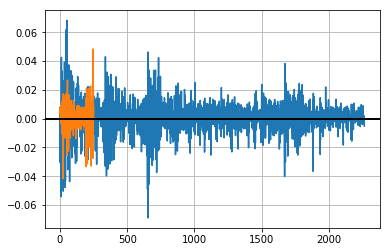

In [8]:
close = train['Close Price']
train['log_change'] = np.log(close.shift(-1)) - np.log(close)
train.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

close = test['Close Price']
test['log_change'] = np.log(close.shift(-1)) - np.log(close)
test.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)

In [9]:
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,-0.004679
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.007787
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,-0.030469
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.003391
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,-0.021533


In [10]:
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,0.006378
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,0.004021
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,0.007009
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,0.001661
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,0.001302


In [11]:
def mapping(x):
    if x>0:
        return 1
    else:
        return 0
train['price_change']=train['log_change'].apply(mapping)
test['price_change']=test['log_change'].apply(mapping)
test.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,0.006378,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,0.004021,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,0.007009,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,0.001661,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,0.001302,1


In [12]:
train = train.drop(columns=['log_change'])
test = test.drop(columns=['log_change'])

In [13]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = test.loc[:,test.columns !='price_change']
y_test = test['price_change']

用今天的價格預測明天的漲跌，因此將最後一行row drop

In [14]:
x_train.count()

Date           2264
Open Price     2264
Close Price    2264
High Price     2264
Low Price      2264
Volume         2264
dtype: int64

In [15]:
x_test.count()

Date           252
Open Price     252
Close Price    252
High Price     252
Low Price      252
Volume         252
dtype: int64

In [16]:
x_train = x_train.drop(x_train.index[2263])
x_test = x_test.drop(x_test.index[251])
y_train = y_train.drop(y_train.index[2263])
y_test = y_test.drop(y_test.index[251])

In [17]:
x_train = x_train.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

# data可視化

In [18]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(20, 3))
    plt.scatter(data[feature_name], data['price_change'])
    plt.xlabel(feature_name)
    plt.ylabel('price_change')
    plt.show()

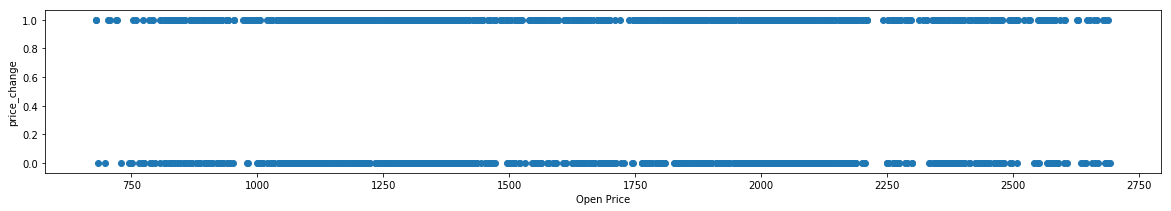

In [19]:
plot_feature(train,'Open Price')

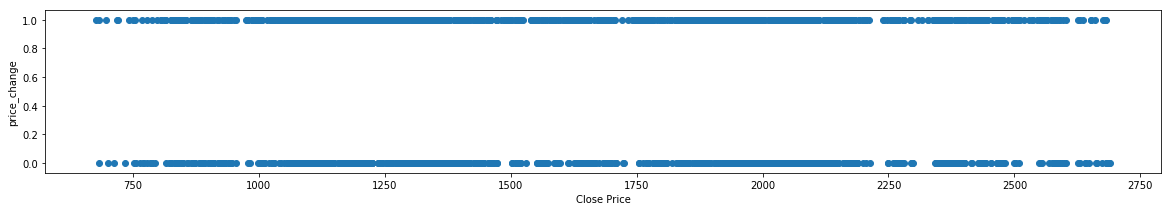

In [20]:
plot_feature(train,'Close Price')

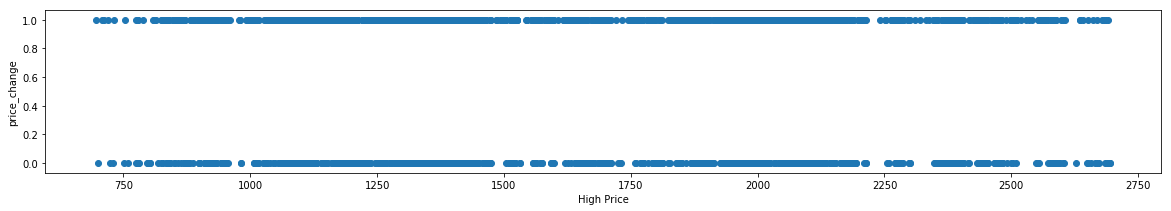

In [21]:
plot_feature(train,'High Price')

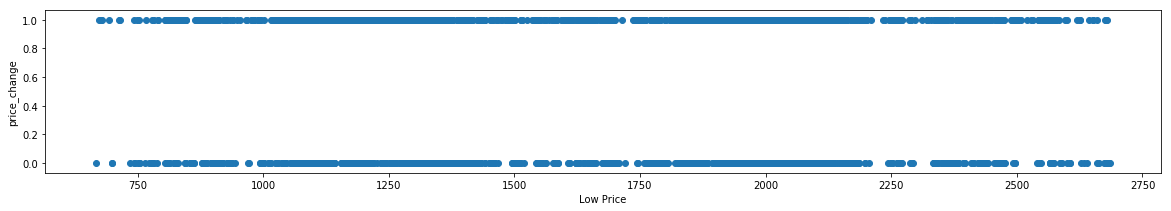

In [22]:
plot_feature(train,'Low Price')

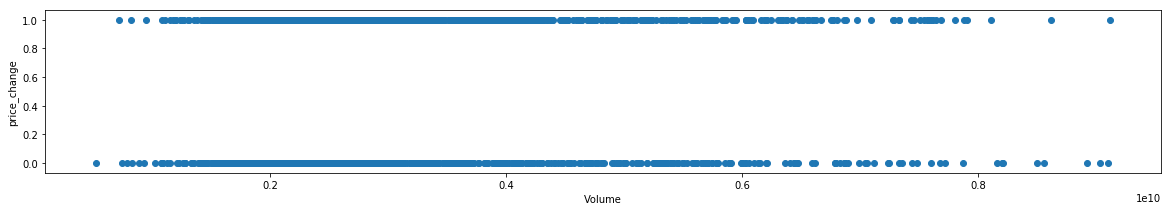

In [23]:
plot_feature(train,'Volume')

# evaluation

In [24]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

# fit the data

In [25]:
def fit_evaluation(model,data):
    model.fit(x_train,y_train)
    evaluate(model, x_train, y_train, x_test, y_test)

## Gradient Descent Mode

In [26]:
model_bl = linear_model.SGDClassifier(loss='log')
fit_evaluation(model_bl, train)

Train accuracy: 0.4538223596995139
Test accuracy: 0.47808764940239046


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Logistic Regression Model

### Import  package for Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression().fit(x_train, y_train)
fit_evaluation(clf, train)

Train accuracy: 0.5461776403004861
Test accuracy: 0.5219123505976095


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
clf.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Ridge Regression

In [31]:
def scorer(model, x, y):
    preds = model.predict(x)
    return metrics.mean_squared_error(y, preds)

In [32]:
alphas = np.linspace(start=0, stop=0.5, num=11)
alphas

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [33]:
mses = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, x_train, y_train, cv=10, scoring=scorer) #cv=10:分十份
    mses.append(mse.mean()) #mse:list

In [34]:
assert len(mses) == 11             # must have the same number of scores as we have alpha values
assert isinstance(mses[0], float)  # i.e. not an array, i.e. mean() has been called
print('Success!')

Success!


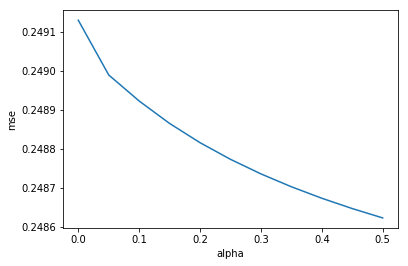

In [35]:
plt.plot(alphas, mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [36]:
best_alpha = alphas[np.argmin(mses)]
best_alpha

0.5

In [37]:
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(x_train, y_train)
train_preds = ridge.predict(x_train)
test_preds = ridge.predict(x_test)
train_mse = metrics.mean_squared_error(y_train, train_preds)
test_mse = metrics.mean_squared_error(y_test, test_preds)
print('Train MSE: %s' % train_mse)
print('Test MSE: %s' % test_mse)

Train MSE: 0.24774788303040193
Test MSE: 0.2493028765759368


In [38]:
alphas = np.linspace(start=0, stop=200, num=90)
alphas

array([  0.        ,   2.24719101,   4.49438202,   6.74157303,
         8.98876404,  11.23595506,  13.48314607,  15.73033708,
        17.97752809,  20.2247191 ,  22.47191011,  24.71910112,
        26.96629213,  29.21348315,  31.46067416,  33.70786517,
        35.95505618,  38.20224719,  40.4494382 ,  42.69662921,
        44.94382022,  47.19101124,  49.43820225,  51.68539326,
        53.93258427,  56.17977528,  58.42696629,  60.6741573 ,
        62.92134831,  65.16853933,  67.41573034,  69.66292135,
        71.91011236,  74.15730337,  76.40449438,  78.65168539,
        80.8988764 ,  83.14606742,  85.39325843,  87.64044944,
        89.88764045,  92.13483146,  94.38202247,  96.62921348,
        98.87640449, 101.12359551, 103.37078652, 105.61797753,
       107.86516854, 110.11235955, 112.35955056, 114.60674157,
       116.85393258, 119.1011236 , 121.34831461, 123.59550562,
       125.84269663, 128.08988764, 130.33707865, 132.58426966,
       134.83146067, 137.07865169, 139.3258427 , 141.57

In [39]:
mses = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, normalize=True)
    mse = model_selection.cross_val_score(ridge, x_train, y_train, cv=10, scoring=scorer) #cv=10:分十份
    mses.append(mse.mean()) #mse:list

In [40]:
assert len(mses) == 90             # must have the same number of scores as we have alpha values
assert isinstance(mses[0], float)  # i.e. not an array, i.e. mean() has been called
print('Success!')

Success!


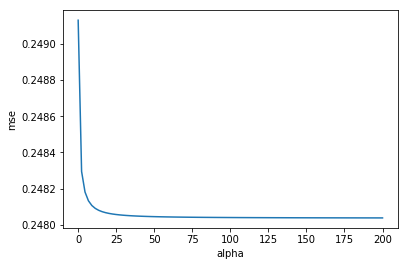

In [41]:
plt.plot(alphas, mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [42]:
best_alpha = alphas[np.argmin(mses)]
best_alpha

200.0

In [43]:
ridge = linear_model.Ridge(alpha=best_alpha, normalize=True)
ridge.fit(x_train, y_train)
train_preds = ridge.predict(x_train)
test_preds = ridge.predict(x_test)
train_mse = metrics.mean_squared_error(y_train, train_preds)
test_mse = metrics.mean_squared_error(y_test, test_preds)
print('Train MSE: %s' % train_mse)
print('Test MSE: %s' % test_mse)

Train MSE: 0.24786249522312453
Test MSE: 0.25008114064969555


In [44]:
for i in range(0, len(x_train.columns)):
    print('Coefficient for %s:%s\t%s' %
          (x_train.columns[i], 
           '\t' if len(x_train.columns[i]) < 8 else '',
           ridge.coef_[i]))

Coefficient for Open Price:	-1.0729162178756634e-07
Coefficient for Close Price:	-1.1441009960751468e-07
Coefficient for High Price:	-1.1082184721624907e-07
Coefficient for Low Price:	-1.098841768528277e-07
Coefficient for Volume:		2.5392692742003013e-14


## drop 'Volume'

In [45]:
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,902.99,931.80,934.73,899.35,4048270080
1,929.17,927.45,936.63,919.53,5413910016
2,931.17,934.70,943.85,927.28,5392620032
3,927.45,906.65,927.45,902.37,4704940032
4,905.73,909.73,910.00,896.81,4991549952


In [46]:
x_train = x_train.drop(['Volume'], axis=1)
x_test = x_test.drop(['Volume'], axis=1)

## Gradient Descent Mode

In [47]:
model_bl = linear_model.SGDClassifier(loss='log')
fit_evaluation(model_bl, train)

Train accuracy: 0.5461776403004861
Test accuracy: 0.5219123505976095


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Logistic Regression Model

In [48]:
clf = LogisticRegression().fit(x_train, y_train)
fit_evaluation(clf, train)

Train accuracy: 0.5466195315952276
Test accuracy: 0.5219123505976095


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
clf.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)